<h1 style="padding:8px; margin:0px -20px; color:#FFF; background:#2E1A24;text-align:center;">
Quand les données racontent la vie : les secrets du sang
</h1>

- AFTISSE Melissa (< aftisse.melissa@etu.u-bordeaux.fr >)
- RAVENDIRANE Gayathiri (< gayathiri.ravendirane@etu.u-bordeaux.fr >)

Version : 2.0

<h2 style="padding:10px; color:#FFF; background:#882255">Introduction</h2>

<h3 style="color:#882255">Contexte et motivation</h3>

<p>Le don de sang est un acte solidaire essentiel qui sauve des milliers de vies chaque année. Pourtant, derrière ce geste altruiste se cachent des enjeux de santé publique complexes : comprendre les facteurs de risque liés aux variations de pression artérielle chez les donneurs, optimiser la sécurité des dons, et identifier les profils nécessitant un suivi particulier.</p>

<p>Notre projet s'inscrit dans une démarche d'analyse de données biomédicales en croisant <strong>sept sources diversifiées</strong> : données cliniques (pression artérielle, valeurs sanguines), informations démographiques (groupes sanguins par pays, comportements de don), données épidémiologiques (prévalence de l'hypertension en Inde), et imagerie médicale (cellules sanguines). Cette hétérogénéité nous permet d'explorer le sujet sous plusieurs angles complémentaires.</p>

<h3 style="color:#882255">Problématiques et questions de recherche</h3>

<p>À travers ce travail, nous cherchons à répondre aux questions suivantes :</p>

<strong>📊 Analyses descriptives et corrélations :</strong>
<ul>
  <li>Quels sont les profils démographiques et cliniques des donneurs de sang selon les différentes bases de données ?</li>
  <li>Existe-t-il des corrélations entre les paramètres biologiques (hémoglobine, glucose, cholestérol) et les variations de pression artérielle ?</li>
  <li>Comment la distribution des groupes sanguins varie-t-elle géographiquement, et peut-on identifier des zones avec des besoins spécifiques en don ?</li>
</ul>

<strong>⚕️ Évaluation des risques :</strong>
<ul>
  <li>Quels sont les facteurs de risque d'hypotension ou d'hypertension post-don (âge, sexe, fréquence des dons, conditions préexistantes) ?</li>
  <li>Peut-on établir des seuils d'alerte basés sur les valeurs cliniques pour prévenir les complications lors du don ?</li>
  <li>Quelles populations présentent une prévalence élevée d'hypertension et nécessiteraient une surveillance accrue ?</li>
</ul>

<strong>🤖 Modélisation prédictive :</strong>
<ul>
  <li>Est-il possible de prédire la variation de pression artérielle après un don en fonction des caractéristiques du donneur ?</li>
  <li>Peut-on construire un modèle de classification pour identifier les "profils à risque" nécessitant une intervention préventive ?</li>
  <li>L'analyse d'images de cellules sanguines par machine learning peut-elle apporter des informations complémentaires sur l'état de santé des donneurs ?</li>
</ul>

<strong>🌍 Perspectives géographiques et temporelles :</strong>
<ul>
  <li>Comment les comportements de don évoluent-ils dans le temps (fréquence, fidélisation des donneurs) ?</li>
  <li>Quelles sont les disparités régionales en termes de santé cardiovasculaire et de disponibilité des groupes sanguins ?</li>
</ul>

<p>Ces questions guideront notre analyse tout au long du projet, en mobilisant des techniques variées : visualisations interactives, tests statistiques, modèles prédictifs, et potentiellement des approches de deep learning pour l'analyse d'images médicales.</p>

<h2 style="padding:10px; color:#FFF; background:#882255">Importation du jeux de données</h2>

In [9]:
# IMPORTS
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual 
import requests
import requests
from PIL import Image
from io import BytesIO


<h3 style="padding:10px; color:#FFF; background:#E3CFC6">Jeu de données 1 (HyperRisk_kaggle)</h3>

<a href="https://www.kaggle.com/datasets/khan1803115/hypertension-risk-model-main " style="color :#882255; font-style: italic "> Lien du jeu de données </a>

- (4240, 13)
- **Type de données présentes :** numérique
- **Format du fichier :** `.csv`
- **Points clés :** variables liées à l’**hypertension** et facteurs de risque (âge, mesures cliniques). Utile pour créer des indicateurs de risque, segmenter des patients et entraîner des modèles prédictifs.

In [2]:
HyperRiskModel_kaggle = pd.read_csv("https://gayathiri-ravendirane.emi.u-bordeaux.fr/DATA/HyperRiskModel_kaggle.csv")
print(HyperRiskModel_kaggle.shape)
HyperRiskModel_kaggle.head()

(4240, 13)


,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<h3 style="padding:10px; color:#FFF; background:#E3CFC6">Jeu de données 2 (BloodPressure_kaggle)</h3>
<a href="https://www.kaggle.com/datasets/jayaprakashpondy/blood-pressure " style="color :#882255; font-style: italic "> Lien du jeu de données </a>

- (2000, 15)
- **Type de données présentes :** numérique 
- **Format du fichier :** `.csv`
- **Points clés :** mesures de pression artérielle (systolique/diastolique) et métadonnées (p. ex. âge, sexe, habitudes). Utile pour la distribution des BP, la définition de seuils (normale/élevée/hypertension) et l’étude de corrélations.

In [3]:
BloodPressure_kaggle = pd.read_csv("https://gayathiri-ravendirane.emi.u-bordeaux.fr/DATA/BloodPressure_kaggle.csv")
print(BloodPressure_kaggle.shape)
BloodPressure_kaggle.head()

(2000, 15)


,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


<h3 style="padding:10px; color:#FFF; background:#E3CFC6">Jeu de données 3 (BloodValues_kaggle)</h3>

<a href="https://www.kaggle.com/datasets/ilhanuysal/bloodvalues  " style="color :#882255; font-style: italic "> Lien du jeu de données </a>

- (4598, 14)
- **Type de données présentes :** numérique
- **Format du fichier :** `.csv`
- **Points clés :** paramètres biologiques (valeurs sanguines) permettant des analyses de profils, la détection d’anomalies et le croisement avec BP/hypotension pour enrichir les features des modèles.

In [4]:
BloodValues_kaggle = pd.read_excel("https://gayathiri-ravendirane.emi.u-bordeaux.fr/DATA/BloodValues_kaggle.xlsx")
print(BloodValues_kaggle.shape)
BloodValues_kaggle.head()

(4598, 14)


,"Gender (0:Female, 1: Male)",Age,Glucose (fasting),AST (Aspartat Aminotransferaz),ALT (Alanin Aminotransferaz),Creatinine,blood urea nitrogen (BUN),blood urea nitrogen - [ÜRE],Thyroid Stimulating Hormone (TSH),Triglyceride,Cholesterol,High Density Lipoprotein (HDL Cholesterol),Low Density Lipoprotein (LDL Cholesterol),Free T4 (FT4)
0,0,59,90,14,12,0.81,11,23.54,0.979,109,196,67.3,107,1.590
1,0,69,144,19,14,0.75,16,34.24,2.420,107,178,46.1,111,0.935
2,0,63,314,11,17,0.86,12,25.68,7.690,443,188,51.4,77,1.320
3,0,63,228,7,17,0.81,21,44.94,3.860,161,248,42.2,174,1.280
4,1,66,97,18,21,0.98,24,51.36,0.414,84,164,41.1,106,1.290


<h3 style="padding:10px; color:#FFF; background:#E3CFC6">Jeu de données 4 (BloodGroupWW_kaggle--distribution des groupes sanguins par pays)</h3>

<a href="https://www.kaggle.com/datasets/shuvokumarbasak4004/global-blood-group-distribution-worldwide-dataset  " style="color :#882255; font-style: italic "> Lien du jeu de données </a>

- (126, 10)
- **Type de données présentes :** catégorielle, numérique
- **Format du fichier :** `.csv`
- **Points clés :** répartition des groupes sanguins (A, B, AB, O, Rh) par pays. Utile pour des cartes/charts comparatifs, analyses géographiques et mise en relation disponibilité/besoins médicaux.

In [5]:
BloodGroupWW_kaggle = pd.read_csv("https://gayathiri-ravendirane.emi.u-bordeaux.fr/DATA/BloodGroupWW_kaggle/cleaned_blood_type_distribution_by_country.csv")
print(BloodGroupWW_kaggle.shape)
BloodGroupWW_kaggle.head()

(126, 10)


,Country/Dependency,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,"3,074,579",34.10%,31.20%,14.50%,5.20%,6.00%,5.50%,2.60%,0.90%
1,Algeria,"43,576,691",40.00%,30.00%,15.00%,4.25%,6.60%,2.30%,1.10%,0.75%
2,Argentina,"45,479,118",50.34%,31.09%,8.20%,2.16%,4.29%,2.98%,0.74%,0.20%
3,Armenia,"3,021,324",29.00%,46.30%,12.00%,5.60%,2.00%,3.70%,1.00%,0.40%
4,Australia,"25,466,459",38.00%,32.00%,12.00%,4.00%,7.00%,6.00%,2.00%,1.00%


<h3 style="padding:10px; color:#FFF; background:#E3CFC6">Jeu de données 5 (BloodDonation_kaggle)</h3>

<a href="https://www.kaggle.com/datasets/kundanbedmutha/blood-donation-portal-dataset  " style="color :#882255; font-style: italic "> Lien du jeu de données </a>

- (4598, 14)
- **Type de données présentes :** catégorielle, numérique et dates
- **Format du fichier :** `.csv`
- **Points clés :** ce jeu de données contient des informations démographiques, des conditions médicales et des informations d’éligibilité. Il ouvre la voie à des analyses descriptives des donneurs en explorant les variables (age, sexe, type de sang, cdt medicales...), à des modélisations prédictives des dons (afin d'optimiser les campagnes de relance par exemple)...

In [6]:
BloodDonation_kaggle = pd.read_csv("https://melissa-aftisse.emi.u-bordeaux.fr/DATA/blood_donation.csv")
print(BloodDonation_kaggle.shape)
BloodDonation_kaggle.head()

(10000, 18)


,Donor_ID,Full_Name,Gender,Age,Blood_Group,Contact_Number,Email,City,State,Country,Last_Donation_Date,Total_Donations,Eligible_for_Donation,Medical_Condition,Weight_kg,Hemoglobin_g_dL,Donation_Center,Registration_Date
0,DNR000001,Sangeeta Menon,Female,38,O+,1819600042,sangeeta.menon8280@gmail.com,Kolkata,West Bengal,India,07-10-2025,1,Yes,NaN,66.6,13.6,Red Cross Blood Bank,02-07-2021
1,DNR000002,Meena Iyer,Female,49,B+,265423420,meena.iyer6225@gmail.com,Jaipur,Rajasthan,India,08-11-2020,1,No,Hypertension,70.8,14.0,Metro Blood Bank,03-03-2023
2,DNR000003,Priya Nair,Female,29,B+,1849593012,priya.nair4742@gmail.com,Gurgaon,Haryana,India,12-04-2025,2,No,Diabetes,73.4,12.5,Fortis Blood Bank,15-10-2015
3,DNR000004,Vijay Kapoor,Male,29,O+,3419283185,vijay.kapoor4423@gmail.com,Thiruvananthapuram,Kerala,India,21-02-2025,1,Yes,NaN,57.9,14.8,NABL Blood Centre,09-05-2022
4,DNR000005,Rahul Iyer,Male,27,A+,6413953676,rahul.iyer2341@gmail.com,Bhopal,Madhya Pradesh,India,18-04-2024,1,Yes,NaN,74.0,17.1,NABL Blood Centre,13-07-2022


<h3 style="padding:10px; color:#FFF; background:#E3CFC6">Jeu de données 6 (BloodIndia_gouv)</h3>

<a href="https://www.data.gov.in/resource/stateut-wise-prevalence-hypertension-blood-glucose-obesity-among-adults-and-overweight" style="color :#882255; font-style: italic "> Lien du jeu de données </a>

- (36, 8)
- **Type de données présentes :** numérique (pourcentages), catégorielle (États/Territoires de l'Inde)
- **Format du fichier :** `.json`
- **Points clés :** données épidémiologiques par État/Territoire indien concernant la prévalence de l'**hypertension**, du diabète (glucose sanguin élevé), de l'obésité et du surpoids chez les adultes. Utile pour des analyses géographiques comparatives, l'identification de zones à risque élevé, et l'étude des corrélations entre différents indicateurs de santé. Permet de contextualiser les problématiques de santé liées au sang dans un cadre géographique spécifique.

In [7]:
# 1. Define the URL
url = "https://gayathiri-ravendirane.emi.u-bordeaux.fr/DATA/BloodIndia_gouv.json"

try:
    # 2. Fetch the data using requests
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

    # 3. Parse the JSON content into a Python dictionary
    data_dict = response.json()

    # 4. Manually extract column names and data rows
    # The column names are under the 'label' key in the 'fields' list
    column_names = [field['label'] for field in data_dict['fields']]
    
    # The actual data is under the 'data' key
    data_rows = data_dict['data']

    # 5. Create the DataFrame
    BloodIndia_gouv = pd.DataFrame(data_rows, columns=column_names)

    # Display the result
    print("Data loaded successfully.")
    print(BloodIndia_gouv.shape)
    print(BloodIndia_gouv.head())

except requests.exceptions.RequestException as e:
    print(f"Error fetching the URL: {e}")
except KeyError as e:
    print(f"Error parsing JSON structure. Missing expected key: {e}")

Data loaded successfully.
(36, 8)
                      State/UT  \
0                        India   
1  Andaman and Nicobar Islands   
2               Andhra Pradesh   
3            Arunachal Pradesh   
4                        Assam   

  Prevalence of Hypertension1 Among Women Age 15 and Over  \
0                                               21.3        
1                                               25.3        
2                                               25.3        
3                                               24.9        
4                                               19.1        

  Prevalence of Hypertension1 Among Men Age 15 and Over  \
0                                                 24      
1                                               30.2      
2                                                 29      
3                                               33.1      
4                                               20.3      

  Percentage of Women Age 15 and Over w

<h3 style="padding:10px; color:#FFF; background:#E3CFC6">Jeu de données 7 (BCCD_github)</h3>

<a href="https://github.com/akshaylamba/all_CELL_data.git" style="color :#882255; font-style: italic "> Lien du jeu de données </a>

- (410+ images, annotations XML associées)
- **Type de données présentes :** images microscopiques de cellules sanguines avec annotations XML (coordonnées de bounding boxes)
- **Format du fichier :** `.jpg` (images) et `.xml` (annotations)
- **Points clés :** collection d'images de frottis sanguins colorés montrant différents types de cellules (globules rouges, globules blancs, plaquettes). Chaque image est accompagnée d'un fichier XML contenant les annotations pour la détection d'objets. Idéal pour entraîner des modèles de **computer vision** (détection d'objets, classification de cellules) et pour l'apprentissage automatique appliqué à l'analyse d'images médicales.


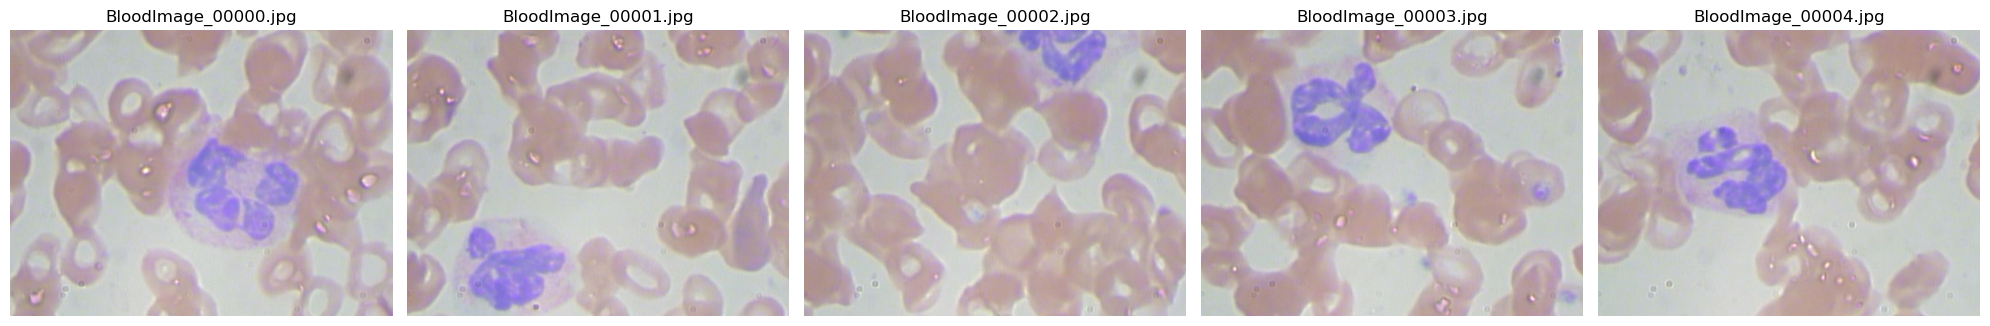

In [10]:
# Base URL for blood images
base_url = "https://gayathiri-ravendirane.emi.u-bordeaux.fr/DATA/BCCD_github/"

# List of first 5 image filenames
image_files = [
    "BloodImage_00000.jpg",
    "BloodImage_00001.jpg",
    "BloodImage_00002.jpg",
    "BloodImage_00003.jpg",
    "BloodImage_00004.jpg"
]

# Create a figure with a 1x5 grid
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for idx, img_file in enumerate(image_files):
    img_url = base_url + img_file
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    axes[idx].imshow(img)
    axes[idx].set_title(img_file)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

<h3 style="color:#FFF; background:#882255">Jeux de données explorés mais non retenus</h3>

<p>Au cours de notre recherche, plusieurs jeux de données ont été envisagés mais finalement écartés pour des raisons méthodologiques :</p>

<strong> - <a href="https://www.kaggle.com/datasets/ninalabiba/blood-transfusion-dataset/data" style="color :#882255; font-style: italic">Blood Transfusion Dataset</a></strong>
<ul>
  <li><strong>Raison de l'exclusion</strong> : Seulement 4 variables explicatives (Recency, Frequency, Monetary, Time) avec 748 observations</li>
  <li><strong>Limites identifiées</strong> : 
    <ul>
      <li>Absence de données cliniques (pression artérielle, valeurs biologiques)</li>
      <li>Pas d'informations démographiques détaillées (âge, sexe, groupe sanguin)</li>
      <li>Données trop simplistes pour des modèles prédictifs robustes</li>
      <li>Impossibilité de croiser avec d'autres sources pour enrichir l'analyse</li>
    </ul>
  </li>
</ul>

<strong> - <a hearf= "https://database.coffeeinstitute.org/" style="color :#882255; font-style: italic">Coffee Quality Institute Database</a></strong>
<ul>
  <li><strong>Raison du changement de thématique</strong> : Thème initial abandonné au profit du don de sang</li>
  <li><strong>Limites constatées</strong> :
    <ul>
      <li>Manque de diversité des sources (dépendance à une seule base principale)</li>
      <li>Nombreux datasets dérivés ou redondants sur Kaggle</li>
      <li>Données peu fiables pour certaines sources secondaires</li>
      <li>Thématique moins alignée avec nos intérêts en sciences de la santé</li>
    </ul>
  </li>
</ul>


<h2 style="color:#FFF; background:#882255">Méthodologie et étapes à venir</h2>

<strong>Web scraping enrichissement (optionnel)</strong>
<ul>
  <li><a href="https://www.mayoclinic.org/" style="color :#882255; font-style: italic">Mayo Clinic</a> : extraction de statistiques médicales, symptômes, facteurs de risque</li>
  <li><a href="https://www.who.int/teams/health-product-policy-and-standards/standards-and-specifications/blood-and-products-of-human-origin/quality-and-safety/global-database-on-blood-safety" style="color :#882255; font-style: italic">WHO Global Database on Blood Safety</a> : données internationales sur la collecte et la sécurité du sang</li>
</ul>

<p>Pour mener à bien ce projet, nous suivrons la chaîne de traitement classique en Science des Données : <strong>Fetch ● Clean ● Structure ● Model ● Analyze ● Visualize</strong></p>

<strong>📋 Étapes prévues :</strong>

<strong>1. Nettoyage et préparation des données (Clean & Structure)</strong>
<ul>
  <li>Traitement des valeurs manquantes et aberrantes</li>
  <li>Harmonisation des formats et unités entre les différents datasets</li>
  <li>Fusion intelligente des jeux de données complémentaires</li>
  <li>Création de nouvelles variables dérivées pertinentes</li>
</ul>

<strong>2. Analyses exploratoires et visualisations (Analyze & Visualize)</strong>
<ul>
  <li>Statistiques descriptives par groupe et par pays</li>
  <li>Visualisations interactives avec <code>plotly</code> et <code>seaborn</code></li>
  <li>Cartographie géographique avec <code>geopandas</code> ou <code>ipyleaflet</code> pour les groupes sanguins et la prévalence d'hypertension</li>
  <li>Matrices de corrélation entre variables cliniques</li>
</ul>

<strong>3. Tests statistiques et inférence (Model)</strong>
<ul>
  <li>Tests de Student, ANOVA pour comparer les groupes</li>
  <li>Tests du Chi² pour les variables catégorielles</li>
  <li>Régressions linéaires et logistiques pour identifier les facteurs prédictifs</li>
</ul>

<strong>4. Modélisation prédictive (Model)</strong>
<ul>
  <li>Classification supervisée (Random Forest, SVM, XGBoost) pour prédire les profils à risque</li>
  <li>Régression pour estimer les variations de pression artérielle</li>
  <li>Validation croisée et optimisation des hyperparamètres</li>
</ul>

<strong>5. Machine Learning sur images (optionnel si temps disponible)</strong>
<ul>
  <li>Traitement d'images avec <code>scikit-image</code> ou <code>PIL</code></li>
  <li>Extraction de features des cellules sanguines</li>
  <li>Classification des types de cellules (CNN avec TensorFlow/Keras si faisable)</li>
  <li>Détection d'anomalies visuelles</li>
</ul>



<h2 style="padding:10px; color:#FFF; background:#882255">Plan d'Analyse Détaillé</h2>

<p>Ce plan structure l'ensemble des analyses prévues en associant chaque dataset à des visualisations spécifiques et des questions de recherche ciblées, en suivant le flux : <strong>Fetch ● Clean ● Structure ● Model ● Analyze ● Visualize</strong></p>

---

<h3 style="padding:8px; color:#FFF; background:#C9A0B0">PHASE 1 : EXPLORATION & NETTOYAGE</h3>

<h4 style="color:#882255">Section 1.1 : Qualité et Complétude des Données</h4>

**📊 Datasets utilisés :** 1, 2, 3, 5

**Visualisations :**
- Heatmap des valeurs manquantes (seaborn)
- Graphiques en barres des taux de complétude par colonne
- Boxplots pour détecter les outliers par variable clinique

**❓ Questions :**
- Quelles sont les variables avec le plus de données manquantes ?
- Y a-t-il des valeurs aberrantes dans les mesures cliniques (BP, glucose, cholestérol) ?

---

<h3 style="padding:8px; color:#FFF; background:#C9A0B0">PHASE 2 : ANALYSES DESCRIPTIVES</h3>

<h4 style="color:#882255">Section 2.1 : Profils Démographiques des Donneurs</h4>

**📊 Datasets utilisés :** 5 (BloodDonation_kaggle)

**Visualisations :**
- Pyramide des âges (histogramme groupé par sexe)
- Graphiques en secteurs pour la distribution des groupes sanguins
- Barplots des conditions médicales préexistantes
- Distributions des intervalles entre dons (violin plots)

**❓ Questions :**
- Quelle est la répartition âge/sexe des donneurs ?
- Quelles sont les conditions médicales les plus fréquentes ?
- Quel est le profil type du donneur régulier vs occasionnel ?

---

<h4 style="color:#882255">Section 2.2 : Distribution de la Pression Artérielle</h4>

**📊 Datasets utilisés :** 2 (BloodPressure_kaggle)

**Visualisations :**
- Histogrammes de distribution (systolique et diastolique)
- Scatter plot systolique vs diastolique avec zones de classification (normale/élevée/hypertension)
- KDE plots pour comparer les distributions par sexe et par tranche d'âge
- Boxplots par catégories démographiques

**❓ Questions :**
- Quelle est la distribution normale de la pression artérielle dans la population ?
- Comment définir les seuils de risque (hypotension, préhypertension, hypertension) ?
- Y a-t-il des différences significatives entre hommes et femmes ?

---

<h4 style="color:#882255">Section 2.3 : Paramètres Biologiques Sanguins</h4>

**📊 Datasets utilisés :** 3 (BloodValues_kaggle)

**Visualisations :**
- Matrice de corrélation (heatmap) entre tous les paramètres biologiques
- Pairplot des variables principales (hémoglobine, glucose, cholestérol)
- Distributions univariées pour chaque biomarqueur
- Radar charts pour profiler des groupes de patients

**❓ Questions :**
- Quelles sont les valeurs normales vs pathologiques des biomarqueurs ?
- Existe-t-il des corrélations fortes entre certains paramètres sanguins ?
- Peut-on identifier des profils biologiques distincts ?

---

<h3 style="padding:8px; color:#FFF; background:#C9A0B0">PHASE 3 : ANALYSES GÉOGRAPHIQUES</h3>

<h4 style="color:#882255">Section 3.1 : Cartographie de la Distribution des Groupes Sanguins</h4>

**📊 Datasets utilisés :** 4 (BloodGroupWW_kaggle)

**Visualisations :**
- Choropleth map mondiale (plotly/geopandas) pour chaque groupe sanguin (A, B, AB, O)
- Heatmap comparative des pourcentages par pays
- Barplots horizontaux des top 10 pays par groupe sanguin
- Stacked bar charts pour visualiser la composition globale par région

**❓ Questions :**
- Quelles régions du monde ont des prédominances spécifiques (ex: O+ en Europe, B+ en Asie) ?
- Où se situent les zones de pénurie potentielle pour les groupes rares (AB-, O-) ?
- Y a-t-il des patterns géographiques liés à l'évolution ou aux migrations ?

---

<h4 style="color:#882255">Section 3.2 : Prévalence de l'Hypertension en Inde</h4>

**📊 Datasets utilisés :** 6 (BloodIndia_gouv)

**Visualisations :**
- Choropleth map de l'Inde colorée par taux d'hypertension
- Barplots comparatifs entre États pour hypertension, diabète, obésité
- Scatter plot : hypertension vs obésité (corrélation régionale)
- Heatmap des 4 indicateurs (hypertension, glucose élevé, obésité, surpoids) par État

**❓ Questions :**
- Quels États indiens présentent les taux d'hypertension les plus élevés ?
- Existe-t-il une corrélation régionale entre hypertension et obésité/diabète ?
- Quelles zones nécessitent des campagnes de prévention prioritaires ?

---

<h3 style="padding:8px; color:#FFF; background:#C9A0B0">PHASE 4 : ANALYSES STATISTIQUES & CORRÉLATIONS</h3>

<h4 style="color:#882255">Section 4.1 : Facteurs de Risque de l'Hypertension</h4>

**📊 Datasets utilisés :** 1 (HyperRisk_kaggle) + 2 (BloodPressure_kaggle) + 3 (BloodValues_kaggle)

**Visualisations :**
- Matrice de corrélation entre BP et paramètres cliniques (âge, BMI, glucose, cholestérol)
- Boxplots de BP par catégorie (âge, sexe, habitudes de vie)
- Partial dependence plots pour isoler l'effet de chaque variable
- Violin plots stratifiés

**Tests statistiques :**
- Corrélations de Pearson/Spearman
- Tests t de Student (comparaison groupes)
- ANOVA (comparaison multiple)
- Chi² pour variables catégorielles

**❓ Questions :**
- Quels facteurs sont les plus corrélés à l'hypertension (âge, sexe, glucose, cholestérol) ?
- L'IMC et le glucose sont-ils des prédicteurs indépendants ?
- Y a-t-il des interactions significatives entre variables ?

---

<h4 style="color:#882255">Section 4.2 : Prédiction du Risque de Don</h4>

**📊 Datasets utilisés :** 1 + 2 + 3 + 5 (fusion intelligente)

**Visualisations :**
- Feature importance plots (Random Forest, XGBoost)
- SHAP values pour l'interprétabilité
- Confusion matrix et ROC curves
- Calibration plots

**Tests statistiques :**
- Régression logistique (odds ratios)
- Tests de significativité des coefficients

**❓ Questions :**
- Peut-on établir un score de risque combinant âge, BP, biomarqueurs et historique de dons ?
- Quels sont les seuils d'alerte cliniques pour refuser un don ?
- Quelles variables sont les plus prédictives d'une complication post-don ?

---

<h3 style="padding:8px; color:#FFF; background:#C9A0B0">PHASE 5 : MODÉLISATION PRÉDICTIVE</h3>

<h4 style="color:#882255">Section 5.1 : Classification des Profils à Risque</h4>

**📊 Datasets utilisés :** 1 + 2 + 3 + 5 (dataset intégré)

**Modèles :**
- Régression logistique (baseline)
- Random Forest Classifier
- XGBoost Classifier
- SVM (optionnel)

**Visualisations :**
- Confusion matrices comparatives
- ROC curves multi-modèles (AUC)
- Precision-Recall curves
- Feature importance rankings
- Learning curves (validation croisée)

**Métriques :**
- Accuracy, Precision, Recall, F1-Score
- AUC-ROC
- Validation croisée (K-fold)

**❓ Questions :**
- Peut-on classifier automatiquement les donneurs en "risque faible/moyen/élevé" ?
- Quel modèle offre le meilleur compromis performance/interprétabilité ?
- Quelles features sont les plus discriminantes ?

---

<h4 style="color:#882255">Section 5.2 : Régression de la Pression Artérielle</h4>

**📊 Datasets utilisés :** 2 + 3 (BP + biomarqueurs)

**Modèles :**
- Régression linéaire multiple
- Ridge/Lasso Regression
- Random Forest Regressor
- XGBoost Regressor

**Visualisations :**
- Scatter plots : valeurs prédites vs réelles
- Residual plots
- Feature importance
- Partial dependence plots

**Métriques :**
- RMSE, MAE, R²
- Validation croisée

**❓ Questions :**
- Peut-on prédire la BP systolique/diastolique à partir des biomarqueurs ?
- Quelle est la précision de la prédiction (intervalle de confiance) ?
- Quelles variables biologiques ont l'impact le plus fort sur la BP ?

---

<h4 style="color:#882255">Section 5.3 : Segmentation des Donneurs (Clustering)</h4>

**📊 Datasets utilisés :** 5 (BloodDonation_kaggle)

**Modèles :**
- K-Means
- DBSCAN
- Hierarchical Clustering

**Visualisations :**
- Elbow plot (nombre optimal de clusters)
- PCA/t-SNE pour visualisation 2D/3D des clusters
- Radar charts des profils moyens par cluster
- Silhouette plots

**❓ Questions :**
- Peut-on identifier des segments naturels de donneurs (réguliers, occasionnels, à risque) ?
- Quelles sont les caractéristiques dominantes de chaque cluster ?
- Comment adapter les campagnes de don par segment ?

---

<h3 style="padding:8px; color:#FFF; background:#C9A0B0">PHASE 6 : COMPUTER VISION </h3>

<h4 style="color:#882255">Section 6.1 : Classification des Cellules Sanguines</h4>

**📊 Datasets utilisés :** 7 (BCCD_github)

**Approches :**
- Extraction de features (couleur, forme, texture)
- Classification traditionnelle (SVM, Random Forest sur features extraites)
- CNN (TensorFlow/Keras) si ressources disponibles

**Visualisations :**
- Grilles d'images annotées par type cellulaire
- Confusion matrix (RBC, WBC, Platelets)
- Grad-CAM pour visualiser les zones d'attention du CNN
- Distribution des classes

**❓ Questions :**
- Peut-on automatiser la classification des types cellulaires ?
- Quelle précision atteint-on avec des méthodes classiques vs deep learning ?
- Les anomalies cellulaires sont-elles détectables visuellement ?

---

<h3 style="padding:8px; color:#FFF; background:#C9A0B0">PHASE 7 : SYNTHÈSE & RECOMMANDATIONS</h3>

<h4 style="color:#882255">Section 7.1 : Dashboard Intégratif</h4>

**📊 Datasets utilisés :** Tous (fusion)

**Visualisations :**
- Dashboard interactif Plotly Dash avec:
  - Carte mondiale des groupes sanguins
  - Indicateurs clés (taux de don, prévalence hypertension)
  - Filtres dynamiques (pays, âge, sexe)
  - Simulateur de risque individuel

**❓ Questions :**
- Quels sont les insights actionnables pour les centres de don ?
- Comment prioriser les campagnes de sensibilisation ?
- Quelles populations nécessitent un suivi médical renforcé ?

---

<h3 style="padding:8px; color:#FFF; background:#E3CFC6">Tableau Récapitulatif des Couplages Datasets</h3>

| **Phase** | **Datasets** | **Type d'analyse** | **Flow** |
|-----------|-------------|-------------------|----------|
| Exploration | 1, 2, 3, 5 | Descriptive, nettoyage | Clean & Structure |
| Démographie | 5 | Descriptive, visualisation | Analyze & Visualize |
| Pression artérielle | 2 | Descriptive, distribution | Analyze & Visualize |
| Biomarqueurs | 3 | Corrélations, profils | Analyze & Visualize |
| Géographie mondiale | 4 | Cartographie, comparaisons | Analyze & Visualize |
| Géographie Inde | 6 | Cartographie, épidémiologie | Analyze & Visualize |
| Risques hypertension | 1 + 2 + 3 | Corrélations, tests statistiques | Analyze & Model |
| Prédiction don | 1 + 2 + 3 + 5 | Classification, régression | Model |
| Segmentation | 5 | Clustering | Model & Analyze |
| Vision | 7 | Classification d'images | Model & Visualize |
| Dashboard | Tous | Synthèse interactive | Visualize |

<div style="padding:8px; margin:0px -20px; color:#FFF; background:#2E1A24; text-align:right">● ● ● </div>